In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from thoi.heuristics.simulated_annealing_multi_order import simulated_annealing_multi_order
from thoi.measures.gaussian_copula import multi_order_measures

/home/laouen.belloli/Documents/git/THOI/thoi/measures/gaussian_copula.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
# read X.tsv
X = np.load("/home/laouen.belloli/Documents/data/Oinfo/tt_hh/N-20_example_data.npy")
T, N = X.shape
print('T:', T, 'N:', N)

T: 100000 N: 20


<AxesSubplot:>

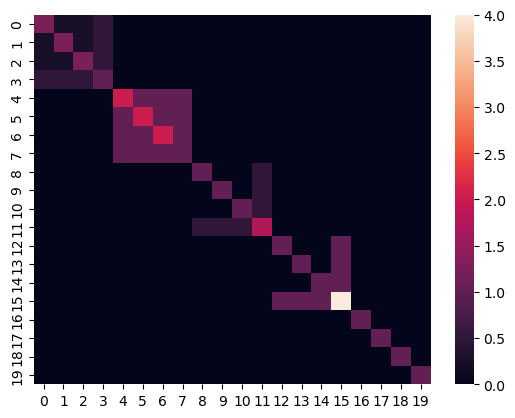

In [3]:
covmat = np.load('/home/laouen.belloli/Documents/data/Oinfo/tt_hh/N-20_example_covmat.npy')

# plot covmat as heatmap
sns.heatmap(covmat)

In [4]:
df_res = multi_order_measures(X)

min_o = df_res['o'].min()

Order:   0%|          | 0/18 [00:00<?, ?it/s]

Batch:   0%|          | 0/1 [00:00<?, ?it/s]

Batch:   0%|          | 0/1 [00:00<?, ?it/s]

Batch:   0%|          | 0/1 [00:00<?, ?it/s]

Batch:   0%|          | 0/1 [00:00<?, ?it/s]

Batch:   0%|          | 0/1 [00:00<?, ?it/s]

Batch:   0%|          | 0/1 [00:00<?, ?it/s]

Batch:   0%|          | 0/1 [00:00<?, ?it/s]

Batch:   0%|          | 0/1 [00:00<?, ?it/s]

Batch:   0%|          | 0/1 [00:00<?, ?it/s]

Batch:   0%|          | 0/1 [00:00<?, ?it/s]

Batch:   0%|          | 0/1 [00:00<?, ?it/s]

Batch:   0%|          | 0/1 [00:00<?, ?it/s]

Batch:   0%|          | 0/1 [00:00<?, ?it/s]

Batch:   0%|          | 0/1 [00:00<?, ?it/s]

Batch:   0%|          | 0/1 [00:00<?, ?it/s]

Batch:   0%|          | 0/1 [00:00<?, ?it/s]

Batch:   0%|          | 0/1 [00:00<?, ?it/s]

Batch:   0%|          | 0/1 [00:00<?, ?it/s]

Early stop reached


Early stop reached


Early stop reached


Early stop reached


Early stop reached


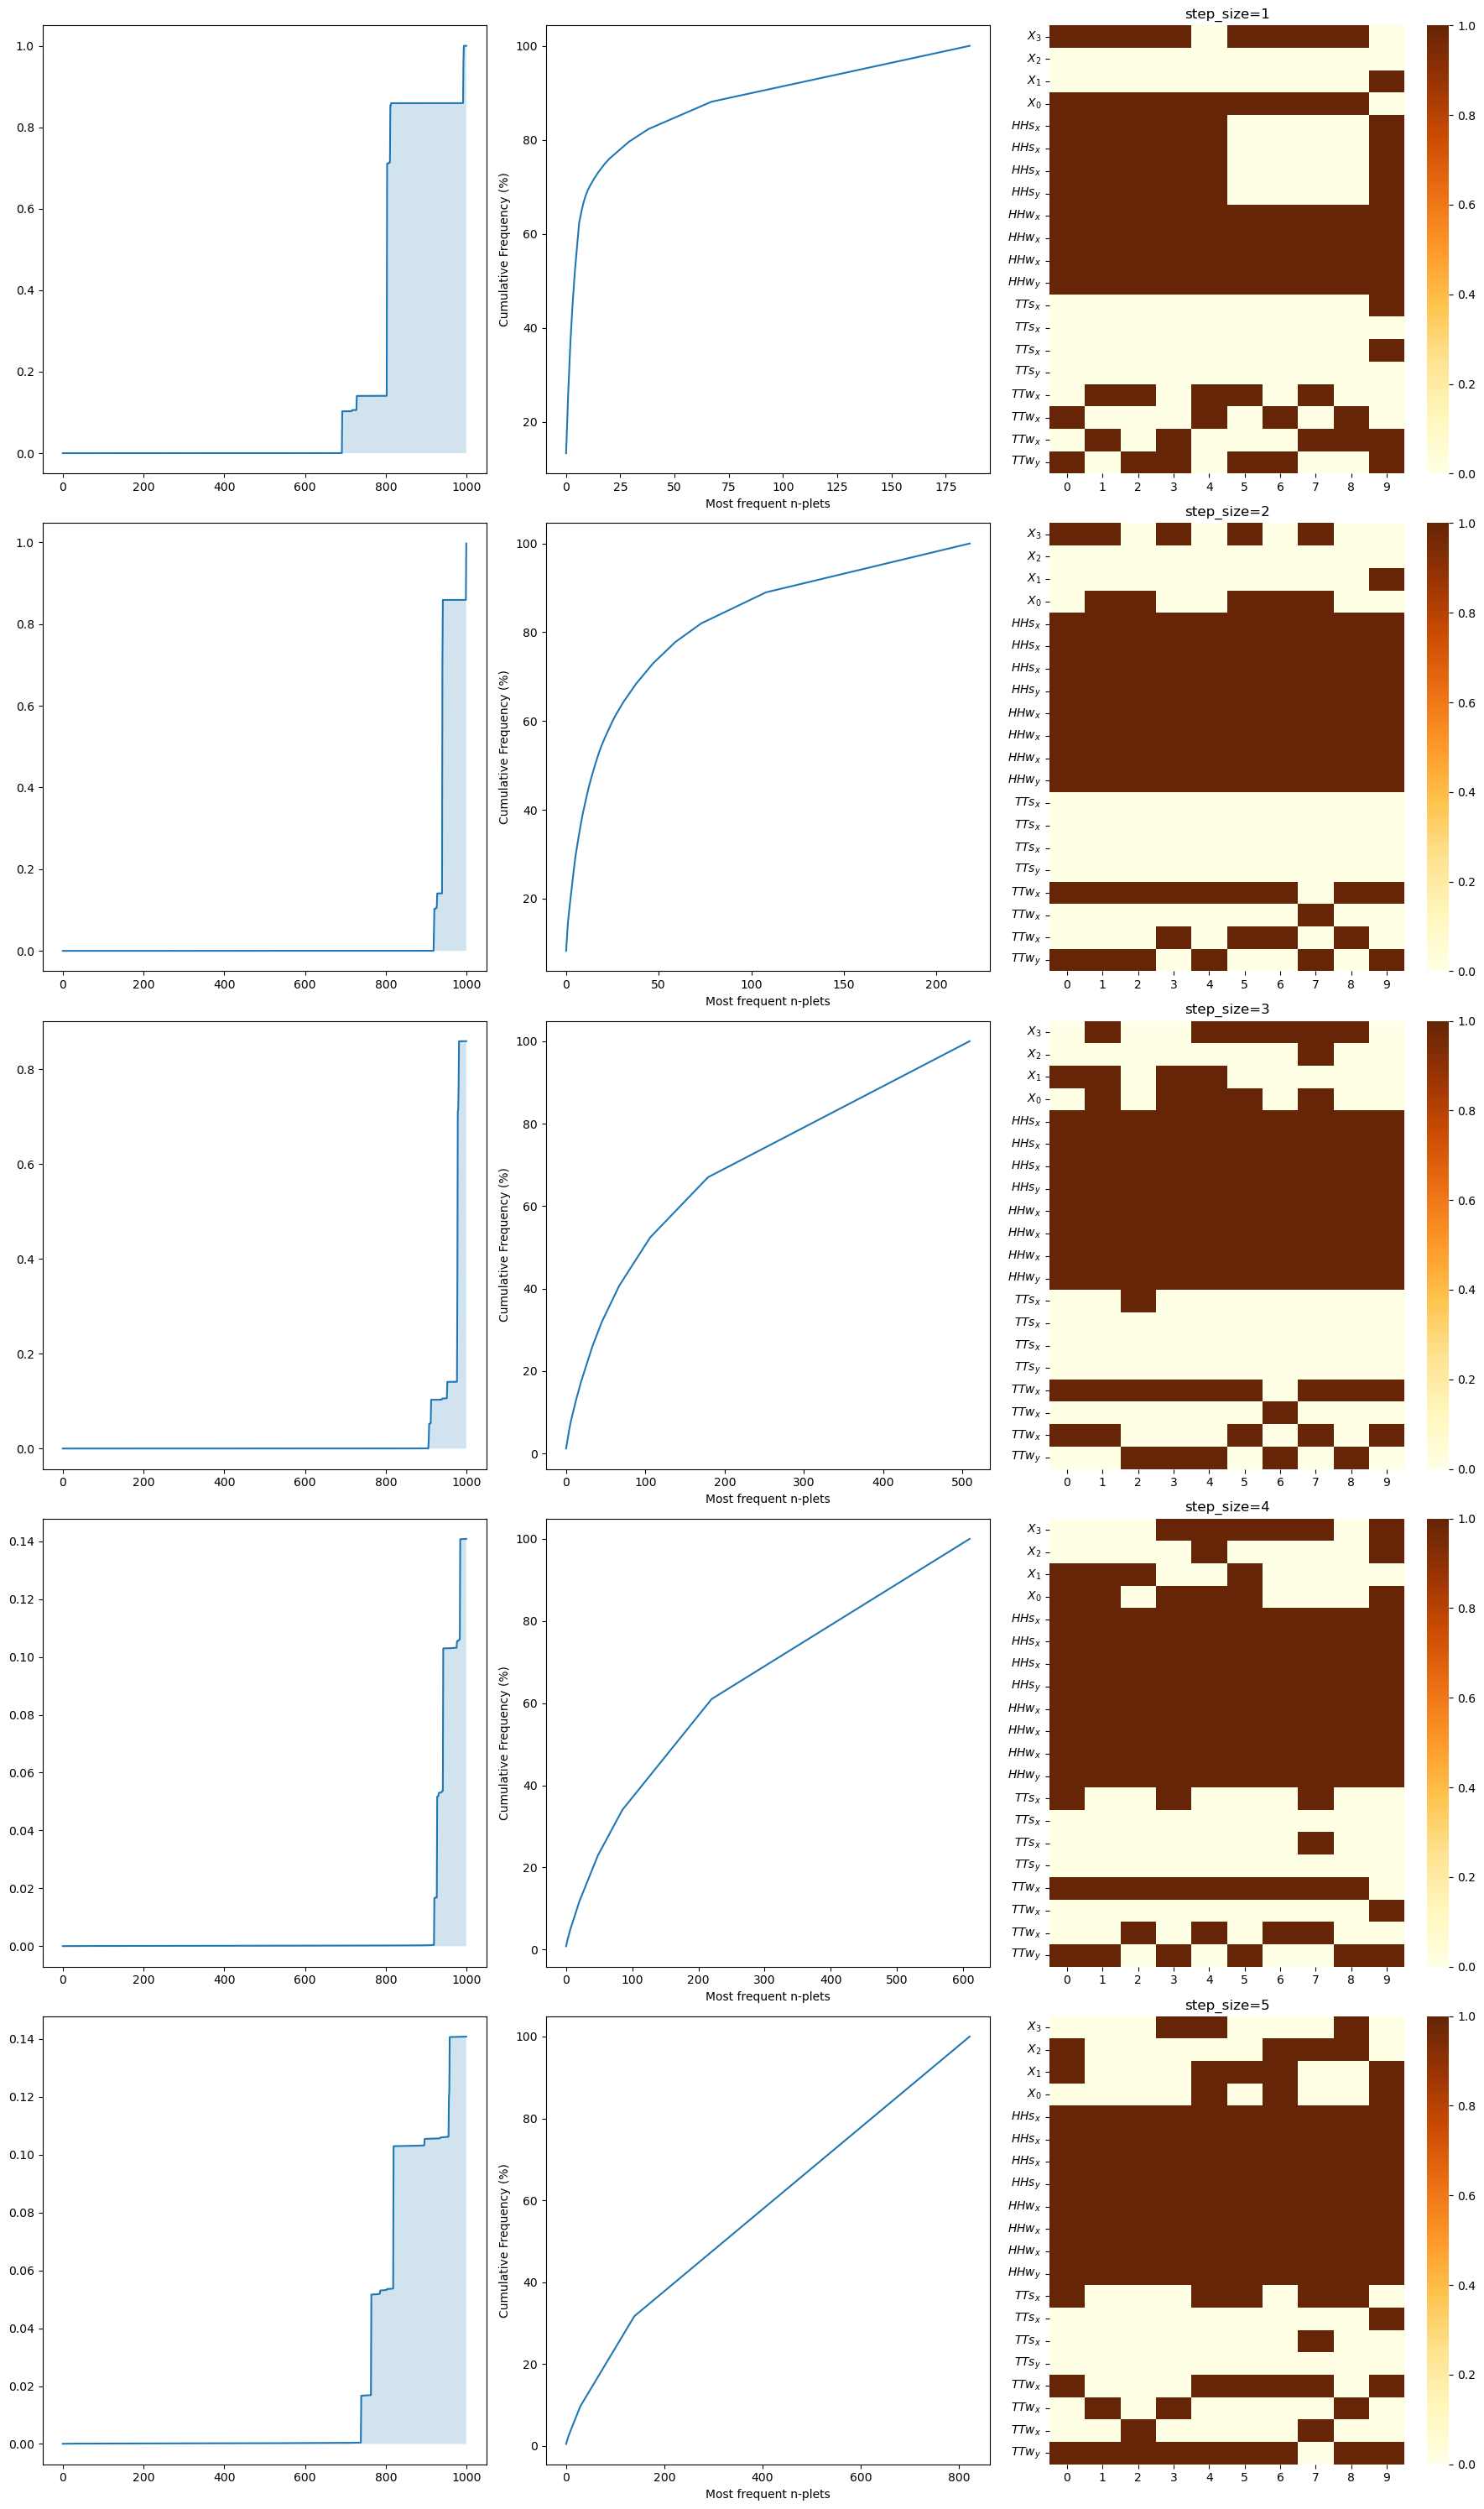

In [5]:
# create two figures side by side
fig, axes = plt.subplots(5, 3, figsize=(3*6, 5*6))

for step_size in [1, 2, 3, 4, 5]:
    axs = axes[step_size - 1]

    sim_res = simulated_annealing_multi_order(X, repeat=1000, step_size=step_size, use_cpu=True)

    unique_rows, counts = np.unique(sim_res[0], axis=0, return_counts=True)

    ax = axs[0]
    # sort oinfos
    oinfo = sim_res[1].numpy()
    oinfo = oinfo[np.argsort(oinfo)]
    
    # get relative error with respect to the minimum min_o
    oinfo = np.abs((oinfo - min_o) / min_o)

    # plot the relative error of the oinfos
    sns.lineplot(
        x=list(range(len(oinfo))),
        y=oinfo,
        ax=ax
    )

    # fill the area between the curve and the x axis
    ax.fill_between(list(range(len(oinfo))), oinfo, 0, alpha=0.2)

    ax = axs[1]

    # convert counts to frequencies
    counts = counts * 100 / counts.sum()

    # sort counts descending
    idx = np.argsort(counts)[::-1]
    counts = counts[idx]
    unique_rows = unique_rows[idx]

    # Compute cumulative frequencies
    cumulative_counts = np.cumsum(counts)

    # Plot the cumulative frequencies
    sns.lineplot(
        x=list(range(len(cumulative_counts))),
        y=cumulative_counts,
        ax=ax
    )

    # Label the axes
    ax.set_ylabel('Cumulative Frequency (%)')
    ax.set_xlabel('Most frequent n-plets')

    ax = axs[2]

    ver_names = (
        [r'$TTw_{{y}}$'] + [rf'$TTw_{{x}}$' for i in range(3)] +
        [r'$TTs_{{y}}$'] + [rf'$TTs_{{x}}$' for i in range(3)] +
        [r'$HHw_{{y}}$'] + [rf'$HHw_{{x}}$' for i in range(3)] +
        [r'$HHs_{{y}}$'] + [rf'$HHs_{{x}}$' for i in range(3)] +
        [rf'$X_{i}$' for i in range(4)]
    )

    # plot the most frequent n-plets
    unique_rows_top = unique_rows[:10]

    # plot the heatmap of the most frequent n-plets
    sns.heatmap(unique_rows_top.T, ax=ax, vmin=0, vmax=1, cmap='YlOrBr')

    # set y labels as ver_names
    ax.set_yticks(np.arange(len(ver_names)) + 0.5)
    ax.set_yticklabels(ver_names, rotation=0)

    ax.set_title('step_size=' + str(step_size))

    # revert heatmap y axis
    ax.invert_yaxis()

# Show the plot
plt.tight_layout()
plt.show()

In [6]:
CORRECT = np.array([0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0])

def single_error_rates(nplets):
    return (nplets.numpy() == CORRECT).sum(axis=0)/nplets.shape[0]

def weigth_absolute_deviation(nplets):
    weigth = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.5,0.5,0.5,0.5])
    elements_errors = np.abs(nplets.numpy() - CORRECT)
    weigthed_errors = np.multiply(elements_errors, weigth)
    errors = np.sum(weigthed_errors, axis=1)
    return errors


errors = []
rates = []
for step_size in [1, 2, 3, 4, 5]:
    
    sim_res = simulated_annealing_multi_order(X, repeat=1000, step_size=step_size, use_cpu=True)
    errors.append(weigth_absolute_deviation(sim_res[0]))
    rates.append(single_error_rates(sim_res[0]))



Early stop reached


Early stop reached


Early stop reached


Early stop reached


Early stop reached


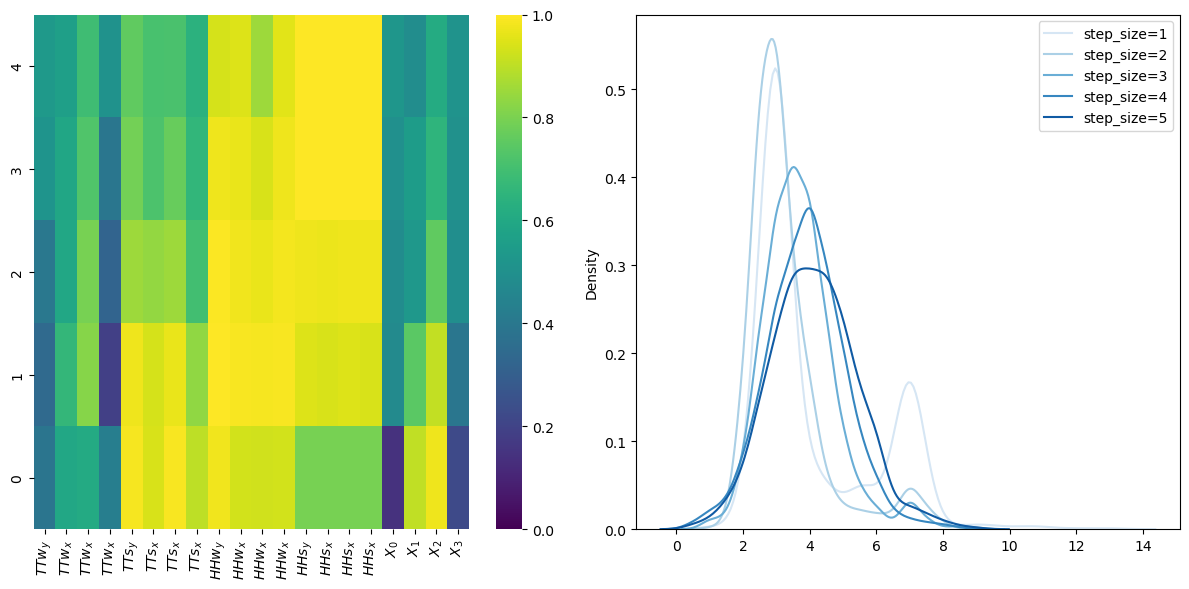

In [7]:
var_names = (
    [r'$TTw_{{y}}$'] + [rf'$TTw_{{x}}$' for i in range(3)] +
    [r'$TTs_{{y}}$'] + [rf'$TTs_{{x}}$' for i in range(3)] +
    [r'$HHw_{{y}}$'] + [rf'$HHw_{{x}}$' for i in range(3)] +
    [r'$HHs_{{y}}$'] + [rf'$HHs_{{x}}$' for i in range(3)] +
    [rf'$X_{i}$' for i in range(4)]
)

fig, axes = plt.subplots(1, 2, figsize=(2*6, 1*6))

# plot heatmap of errors
ax = axes[0]
sns.heatmap(rates, ax=ax, vmin=0, vmax=1, cmap='viridis')
ax.invert_yaxis()

# set x labels as var_names
ax.set_xticks(np.arange(len(var_names)) + 0.5)
ax.set_xticklabels(var_names, rotation=90)

# plot distributions of errors for each step_size
palette = sns.color_palette("Blues", 5)
ax = axes[1]
for i, error in enumerate(errors):
    sns.kdeplot(error, ax=ax, label=f'step_size={i+1}', color=palette[i])

ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [8]:
errors = []
rates = []
temps = [10, 100, 1000, 10000, 100000, 1000000]
for temp in temps:
    
    sim_res = simulated_annealing_multi_order(X, repeat=1000, initial_temp=temp, use_cpu=True)
    errors.append(weigth_absolute_deviation(sim_res[0]))
    rates.append(single_error_rates(sim_res[0]))


Early stop reached


Early stop reached


Early stop reached


Early stop reached


Early stop reached


Early stop reached


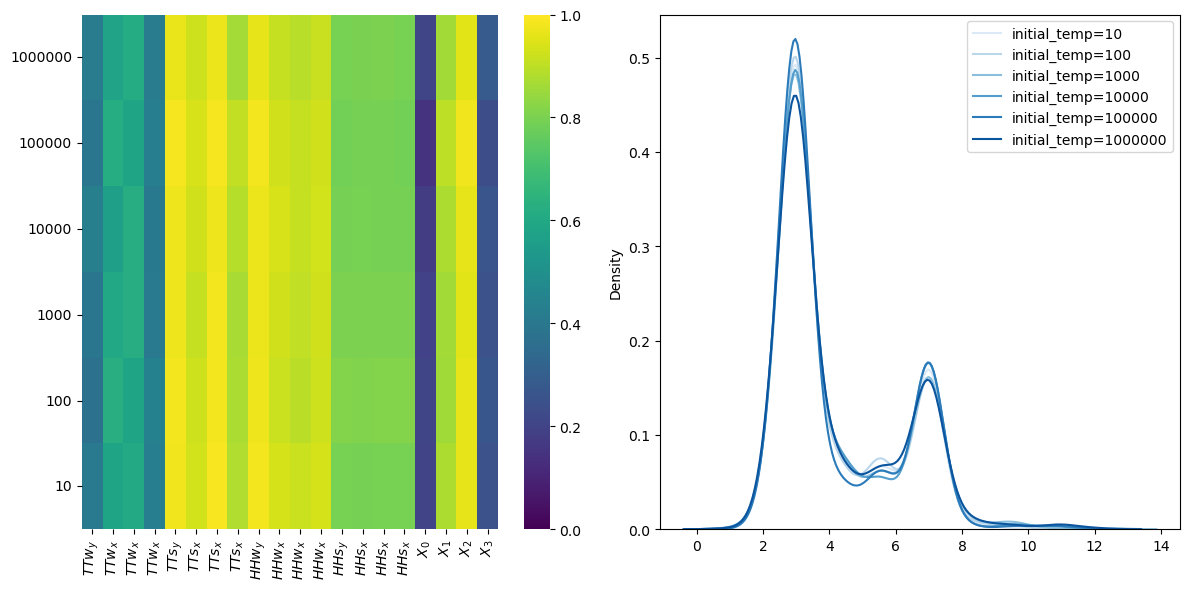

In [9]:
var_names = (
    [r'$TTw_{{y}}$'] + [rf'$TTw_{{x}}$' for i in range(3)] +
    [r'$TTs_{{y}}$'] + [rf'$TTs_{{x}}$' for i in range(3)] +
    [r'$HHw_{{y}}$'] + [rf'$HHw_{{x}}$' for i in range(3)] +
    [r'$HHs_{{y}}$'] + [rf'$HHs_{{x}}$' for i in range(3)] +
    [rf'$X_{i}$' for i in range(4)]
)

fig, axes = plt.subplots(1, 2, figsize=(2*6, 1*6))

# plot heatmap of errors
ax = axes[0]
sns.heatmap(rates, ax=ax, vmin=0, vmax=1, cmap='viridis')
ax.invert_yaxis()

# set x labels as var_names
ax.set_xticks(np.arange(len(var_names)) + 0.5)
ax.set_xticklabels(var_names, rotation=90)

# set y labels as temps
ax.set_yticks(np.arange(len(temps)) + 0.5)
ax.set_yticklabels(temps, rotation=0)

# plot distributions of errors for each step_size
palette = sns.color_palette("Blues", len(temps))
ax = axes[1]
for i, error in enumerate(errors):
    sns.kdeplot(error, ax=ax, label=f'initial_temp={temps[i]}', color=palette[i])

ax.legend()

# Show the plot
plt.tight_layout()
plt.show()